# Problem 1: What’s trending? 

<b>Step 1 : Enter the Search topic : </b> <br/>

In [1]:
SearchTopic = "#SyriaStrikes"

<b>Step 2 : Enter the number of tweets to be retrieved : </b><br/>
<i>Note : Time duration of program execution increases significantly if n is higher.

In [2]:
n=10000

<b>Step 3 : Enter the consumer_key,consumer_secret,access_token and access_secret to connect to connect to twitter.</b>

In [3]:
consumer_key <- "Yt7sY1DmlPmvghfMY4uPglAUN"
consumer_secret <- "Z4IPo0oneJ8MVEN0LsNZqvJaqwC6xITwt48o4kfACeh9ZuTFOh"
access_token <- "771480878128230400-uUNj18X34N6xrgC17HFIz3r9UEYreWm"
access_secret <- "uYr441Lu9chL5BaPy8H0N0UviGD4HZwZmKh9Dw2oUjVny"

<b>Step 5 : Load the required libraries</b> <br/>
•twitteR : For connecting and interacting with twitter. <br/>
•RSQLite : For saving the tweets object to database. <br/>
•ggplot2 : For plotting the points to map. <br/>
•ggmap,maps,mapdata   : For drawing the map on canvas. <br/>

In [4]:
library("twitteR")
library("RSQLite")
library("mapdata")
library(RJSONIO)
library(RCurl)
library("devtools")
library(dplyr)
library("ggplot2")
# library(plyr)
library("ggmap")
library("maps")

Loading required package: maps
Loading required package: bitops

Attaching package: 'dplyr'

The following objects are masked from 'package:twitteR':

    id, location

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

<b>Step 6 : Connect to twitter using the setup_twitter_oauth() function in twitteR package. 

In [5]:
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

[1] "Using direct authentication"


<b>Step 7 : Register a database using RSQLite at curret location with filename  "Vivek50208473dbTweetObject"  </b><br/>
<i>Note : Change file path in sql_lite_file variable to use a different location

In [6]:
db2 <- RSQLite::datasetsDb() # Initialie a database
register_db_backend(db2) #Functions to setup a database backend for twitteR
sql_lite_file='Vivek50208473dbtweetFile' #path to db file
register_sqlite_backend(sql_lite_file)  #create the DBI connection and call register_db_backend

<b>Step 8 : Search and store tweet object for topic and numbers as defined in "SearchTopic" and "n" above. </b><br/>
<b>Step 9 : Store the tweets object in tweet_obj table in database file "vivek50208473".


In [7]:
# try({
#     if(SearchTopic!=""){
#     tweet_obj=searchTwitter(SearchTopic,n)
#     store_tweets_db( tweet_obj,table_name="tweet_with_RT")
#     len=length(tweet_obj)
# }
# cat(len,"tweets searched for the topic ", SearchTopic )
#     }, silent=TRUE)

<b>Step 10 : Load tweet objects from the database using load_tweets_db() function . Print the number of tweets retrieved from db.

In [8]:
db2 <- RSQLite::datasetsDb() # Initialie a database
register_db_backend(db2) #Functions to setup a database backend for twitteR
sql_lite_file='Vivek50208473dbtweetFile' #path to db file
register_sqlite_backend(sql_lite_file)  #create the DBI connection and call register_db_backend
from_db = load_tweets_db(table_name="tweet_with_RT")
cat("Number of tweets retrieved from db ", length(from_db))

Number of tweets retrieved from db  23859

<b>Step 11 : Save user names of the tweets.

In [9]:
df <- twListToDF(from_db)
# dfusers=data.frame(df["screenName"])
# saveRDS(dfusers, file="userscreenname.rds")
# head(dfusers)

    Save tweets to text file

In [10]:
write.table(df, "C:/Users/vivek/Box Sync/Spring 2017/587 DIC/LAB4/tweetdata.txt", sep="\t") 

In [19]:
head(df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
And kd after being used pulles apart for nfl games and superbowl and playoffs me and my kids now is that both or him because i ask did one,FALSE,0,NA,2017-02-17 20:40:16,FALSE,NA,832691154516795392,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",tomanylies3,0,FALSE,FALSE,NA,NA
RT @VoteTrumpPics: I Am Praying for You Mr. President<ed><U+00A0><U+00BD><ed><U+00B9><U+008F> RT<ed><U+00A0><U+00BD><ed><U+00B2><U+00A5> if you #Pray4DJT <ed><U+00A0><U+00BD><ed><U+00B9><U+008F> #SuperBowl #PepsiHalftime #Gaga https://t.co/9fj6a1kZ8h,FALSE,0,NA,2017-02-17 20:40:10,FALSE,NA,832691131179741184,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",saigaJay28,3050,FALSE,FALSE,NA,NA
"RT @NFLRT: ""Be a ballboy, they said."" ""It'll be fun at the #SuperBowl, they said"" https://t.co/TaglOZ4YjC",FALSE,0,NA,2017-02-17 20:40:05,FALSE,NA,832691107695693827,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",pVnY2OhwPwkxNrY,334,FALSE,FALSE,NA,NA
RT @DylanAndMuffins: Love and retweet for Shawn Mendes at #SB52 #ShawnMendes #SuperBowl #iHeartAwards,FALSE,0,NA,2017-02-17 20:39:58,FALSE,NA,832691080696967168,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",patience_shawn,1,FALSE,FALSE,NA,NA
RT @Yeah38305639: #SuperBowl. Go #Patriots,FALSE,0,NA,2017-02-17 20:39:55,FALSE,NA,832691066134425600,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",ringfibuse1972,2,FALSE,FALSE,NA,NA
RT @SurvivorHealer: The NFL reports that Lady Gaga's #SuperBowl Halftime Show was the most watched musical performance in HISTORY with a mi…,FALSE,0,NA,2017-02-17 20:39:48,FALSE,NA,832691038024323072,NA,"<a href=""http://itunes.apple.com/us/app/twitter/id409789998?mt=12"" rel=""nofollow"">Twitter for Mac</a>",VictoriaBm,16,FALSE,FALSE,NA,NA


In [57]:
df$text <- sapply(df$text,function(row) iconv(row, "latin1", "ASCII", sub=""))

In [58]:
write.table(df$text, "C:/Users/vivek/Box Sync/Spring 2017/587 DIC/LAB4/tweettext.txt", sep="\n") 

In [59]:
dataframe.textfield=as.data.frame(df[,1])

In [60]:
head(dataframe.textfield)

"df[, 1]"
And kd after being used pulles apart for nfl games and superbowl and playoffs me and my kids now is that both or him because i ask did one
RT @VoteTrumpPics: I Am Praying for You Mr. President RT if you #Pray4DJT #SuperBowl #PepsiHalftime #Gaga https://t.co/9fj6a1kZ8h
"RT @NFLRT: ""Be a ballboy, they said."" ""It'll be fun at the #SuperBowl, they said"" https://t.co/TaglOZ4YjC"
RT @DylanAndMuffins: Love and retweet for Shawn Mendes at #SB52 #ShawnMendes #SuperBowl #iHeartAwards
RT @Yeah38305639: #SuperBowl. Go #Patriots
RT @SurvivorHealer: The NFL reports that Lady Gaga's #SuperBowl Halftime Show was the most watched musical performance in HISTORY with a mi


In [1]:
dat = read.csv("tweettaghashdata.csv", header = TRUE)

In [2]:
head(dat)

Words,Count
#ALLSNKRS,2
#ASOT800,1
#ATLFalcons,1
#AUDIO,1
#Adafruit,2
#Akansha_Gautam,1


In [55]:
# alpha=head(dat)

alpha

Words,Count
#ALLSNKRS,2
#ASOT800,1
#ATLFalcons,1
#AUDIO,1
#Adafruit,2
#Akansha_Gautam,1
#AllStarGame,1
#Apuesta|,1
#Arena,2
#AskKI,1


In [56]:
class(alpha)

[1] "data.frame"

In [6]:
install.packages("RColorBrewer", repos="http://cran.us.r-project.org/")


package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vivek\AppData\Local\Temp\RtmpOOIia1\downloaded_packages


In [8]:
library(RColorBrewer)
library(wordcloud)

Warning message:
"package 'wordcloud' was built under R version 3.3.3"

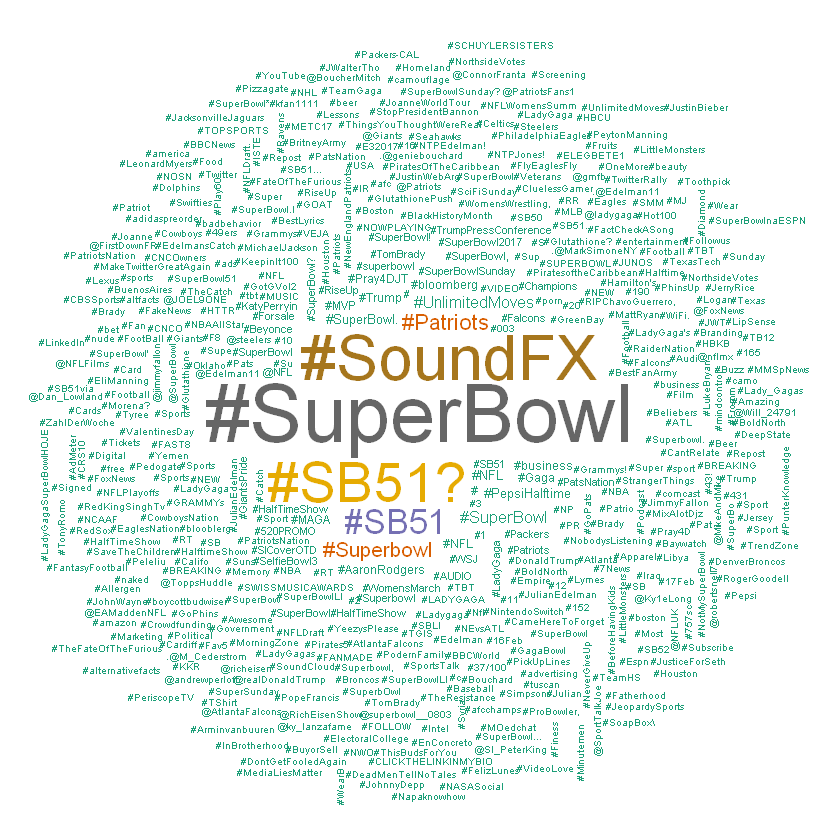

In [13]:
alpha=dat[1:3000,]
# wordcloud(alpha$Words,alpha$Count,scale=c(4,.5),min.freq=3,max.words=Inf,random.order=TRUE, random.color=FALSE, 
#           rot.per=.1,
# colors="black",ordered.colors=FALSE,use.r.layout=FALSE,
# fixed.asp=TRUE)
wordcloud(alpha$Words,alpha$Count,random.order=FALSE,colors=brewer.pal(8,"Dark2"))